In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [3]:
df_llm = pd.read_csv("trades_fingpt_Chronological.csv")
df_llm = df_llm.drop('Unnamed: 0', axis = 1)
df_llm

,Datetime,Open,High,Low,Close,Adj Close,Volume,Random,Chronological,prediction
0,2024-01-02,4820.75,4827.75,4765.50,4783.50,4783.50,1526716,True,True,Positive Developments:1. The Federal Reserve's...
1,2024-01-03,4783.50,4789.00,4741.00,4749.75,4749.75,1592000,True,True,[Prediction]The E mini S&P 500 Future is expec...
2,2024-01-04,4749.75,4766.50,4727.00,4732.25,4732.25,1290818,True,True,Positive Developments:1. The S&P 500 index has...
3,2024-01-05,4732.00,4760.25,4702.00,4735.50,4735.50,1642400,True,True,Firstly the market seems to be on a strong upw...
4,2024-01-07,4735.75,4743.25,4730.25,4732.25,4732.25,35525,True,True,Based on the news and developments in the firs...
...,...,...,...,...,...,...,...,...,...,...
92,2024-04-22,5015.50,5076.75,5006.00,5047.75,5047.75,1494229,True,True,Based on the analysis of the positive developm...
93,2024-04-23,5047.25,5127.25,5042.50,5125.25,5125.25,1305225,True,True,[Prediction]: The E mini S&P 500 Future is exp...
94,2024-04-24,5125.25,5128.75,5070.00,5074.25,5074.25,1442140,True,True,[Prediction]: 5270
95,2024-04-25,5074.50,5134.75,5022.25,5124.25,5124.25,1824936,True,True,[Tuesday April 26 2024]E mini S&P 500 Future: ...


In [10]:
df_llm['prediction'][3]

'Firstly the market seems to be on a strong upward trajectory with technology shares leading the pack. This is a positive sign for the E-mini S&P 500 as technology is a major contributor to the overall market.Secondly there are several strong companies in the market that have shown resilience and strength such as Nvidia and Tesla. Their positive performance can potentially boost the overall market.Thirdly the Federal Reserve\'s fight against inflation which started nearly two years ago has raised interest rates to their highest level in two decades. This can potentially slow down the market\'s growth but also presents an opportunity for investors to take advantage of lower rates and higher dividends.Lastly there are concerns about the market\'s potential overvaluation as suggested by the headline "Where Will Nvidia Stock Be in 2 Years?" and the similarities to the S&P 500 from 2000 to 2002 which could indicate a potential bubble.Based on these factors I predict that the E-mini S&P 500 

In [3]:
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

# Assuming df has a column 'Close' for closing prices
df_llm['RSI'] = calculate_rsi(df_llm['Close'])

In [4]:
df = df_llm[df_llm['Chronological']==True]
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Random,Chronological,prediction,RSI
11926,2024-01-02 00:00:00,4820.75,4823.50,4820.75,4822.25,4822.25,4575,True,True,4813.75,38.628159
11927,2024-01-02 01:00:00,4822.50,4822.50,4819.75,4820.00,4820.00,4434,False,True,4823.25,39.194139
11928,2024-01-02 02:00:00,4820.25,4824.00,4820.25,4822.25,4822.25,7001,False,True,4820.50,40.925267
11929,2024-01-02 03:00:00,4822.50,4827.75,4822.25,4826.50,4826.50,16770,False,True,4823.50,43.918919
11930,2024-01-02 04:00:00,4826.75,4826.75,4815.00,4816.50,4816.50,16693,False,True,4826.25,41.269841
...,...,...,...,...,...,...,...,...,...,...,...
13773,2024-04-26 12:00:00,5134.00,5143.25,5129.25,5143.25,5143.25,98685,False,True,5144.25,72.020725
13774,2024-04-26 13:00:00,5143.25,5146.50,5138.50,5141.75,5141.75,104327,False,True,5149.75,68.421053
13775,2024-04-26 14:00:00,5141.75,5142.50,5133.25,5141.50,5141.50,94654,False,True,5143.50,68.421053
13776,2024-04-26 15:00:00,5141.25,5144.00,5128.75,5129.50,5129.50,181727,True,True,5144.25,51.785714


In [5]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

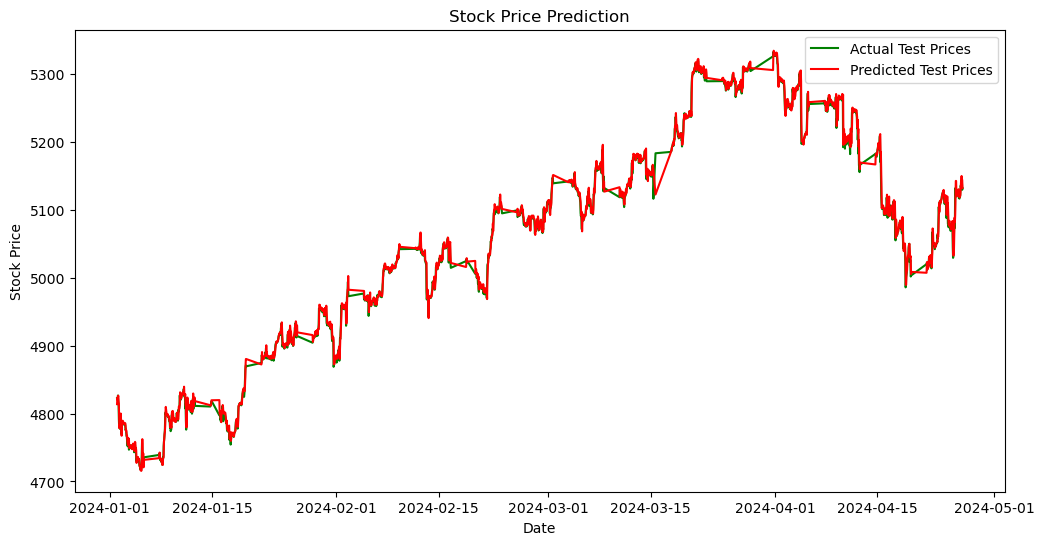

In [6]:
# Plotting
plt.figure(figsize=(12, 6))

plt.plot(df['Datetime'], df['Close'], label='Actual Test Prices', color='green')
plt.plot(df['Datetime'], df['prediction'], label='Predicted Test Prices', color='red')

plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [7]:
# Calculate error metrics
test_mse = mean_squared_error(df['Close'],  df['prediction'])
print("Test MSE:", test_mse)

test_mape = mean_absolute_percentage_error(df['Close'],  df['prediction'])
print("Test MAPE:", test_mape)

Test MSE: 69.14268358531318
Test MAPE: 0.0010214671040637252


Starting capital: $100,000.00
Ending portfolio value: $105,335.48
Profit / Loss: $5,335.48


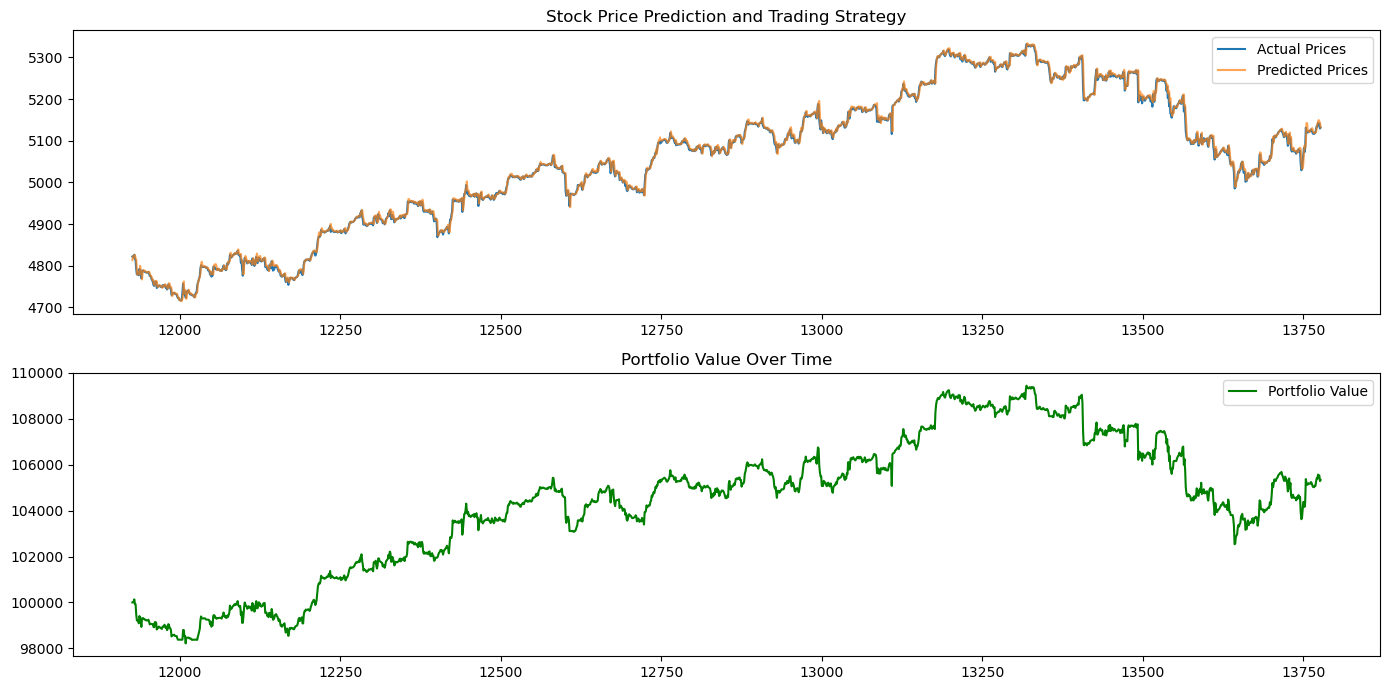

In [8]:
# Set initial capital and current holdings
initial_capital = 100000.0
current_holdings = 0.0
capital = initial_capital

# Create a DataFrame to store trades and capital over time directly using the existing DataFrame
df['Capital'] = initial_capital
df['Holdings'] = 0.0

# Simulate trading
for i in range(1, len(df)):
    if df['prediction'].iloc[i] > df['Close'].iloc[i-1]:
        # Buy signal: Invest all available capital
        if capital > 0:
            current_holdings = capital / df['Close'].iloc[i]
            capital = 0.0
    elif df['prediction'].iloc[i] < df['Close'].iloc[i-1]:
        # Sell signal: Sell all holdings
        if current_holdings > 0:
            capital = current_holdings * df['Close'].iloc[i]
            current_holdings = 0.0
    
    # Update capital and holdings records
    df['Capital'].iloc[i] = capital
    df['Holdings'].iloc[i] = current_holdings

# Calculate final value of portfolio (capital + value of holdings)
final_value = capital + current_holdings * df['Close'].iloc[-1]
print(f"Starting capital: ${initial_capital:,.2f}")
print(f"Ending portfolio value: ${final_value:,.2f}")
print(f"Profit / Loss: ${final_value - initial_capital:,.2f}")

# Plotting the backtest results
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Actual Prices')
plt.plot(df.index, df['prediction'], label='Predicted Prices', alpha=0.7)
plt.title('Stock Price Prediction and Trading Strategy')
plt.legend()

plt.subplot(2, 1, 2)
portfolio_value = df['Capital'] + df['Holdings'] * df['Close']
plt.plot(df.index, portfolio_value, label='Portfolio Value', color='green')
plt.title('Portfolio Value Over Time')
plt.legend()

plt.tight_layout()
plt.show()


Starting capital: $100,000.00
Ending portfolio value: $108,124.31
Profit / Loss: $8,124.31


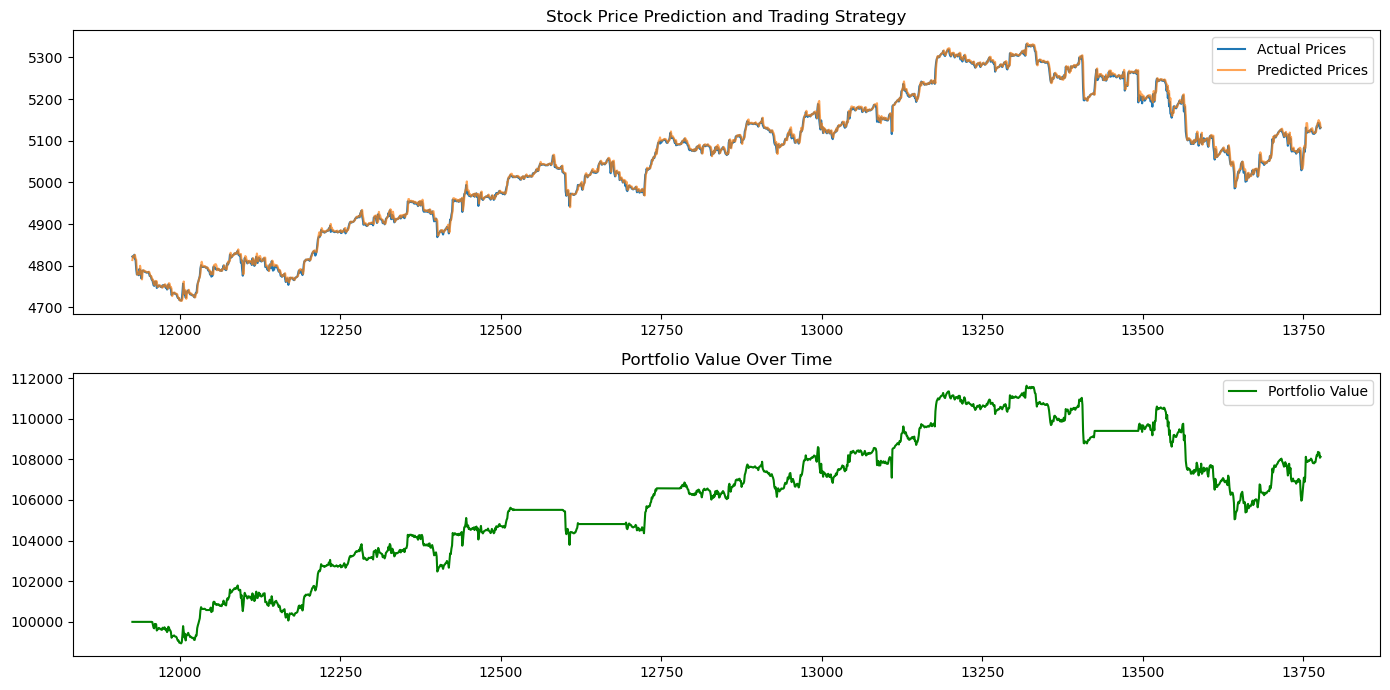

In [17]:
# Set initial capital and current holdings
initial_capital = 100000.0
current_holdings = 0.0
capital = initial_capital

# Create a DataFrame to store trades and capital over time directly using the existing DataFrame
df['Capital'] = initial_capital
df['Holdings'] = 0.0

# Simulate trading
for i in range(1, len(df)):
    rsi_current = df['RSI'].iloc[i]
    if df['prediction'].iloc[i] > df['Close'].iloc[i-1] and rsi_current<20:
        # Buy signal: Invest all available capital
        if capital > 0:
            current_holdings = capital / df['Close'].iloc[i]
            capital = 0.0
    elif df['prediction'].iloc[i] < df['Close'].iloc[i-1] and rsi_current>80:
        # Sell signal: Sell all holdings
        if current_holdings > 0:
            capital = current_holdings * df['Close'].iloc[i]
            current_holdings = 0.0
    
    # Update capital and holdings records
    df['Capital'].iloc[i] = capital
    df['Holdings'].iloc[i] = current_holdings

# Calculate final value of portfolio (capital + value of holdings)
final_value = capital + current_holdings * df['Close'].iloc[-1]
print(f"Starting capital: ${initial_capital:,.2f}")
print(f"Ending portfolio value: ${final_value:,.2f}")
print(f"Profit / Loss: ${final_value - initial_capital:,.2f}")

# Plotting the backtest results
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Actual Prices')
plt.plot(df.index, df['prediction'], label='Predicted Prices', alpha=0.7)
plt.title('Stock Price Prediction and Trading Strategy')
plt.legend()

plt.subplot(2, 1, 2)
portfolio_value = df['Capital'] + df['Holdings'] * df['Close']
plt.plot(df.index, portfolio_value, label='Portfolio Value', color='green')
plt.title('Portfolio Value Over Time')
plt.legend()

plt.tight_layout()
plt.show()
